In [29]:
dataset = "dataku"

In [30]:
#Count datasets
import os
print('total cane images :', len(os.listdir(dataset + '/cane')))
print('total gallina images :', len(os.listdir(dataset + '/gallina')))
print('total ragno images :', len(os.listdir(dataset + '/ragno')))


total = sum([len(os.listdir(dataset + '/cane')),
             len(os.listdir(dataset + '/gallina')),
             len(os.listdir(dataset + '/ragno'))])

print("total datasets : ", total)

total cane images : 4863
total gallina images : 3098
total ragno images : 4821
total datasets :  12782


In [31]:
#check image datasets resolution

from PIL import Image
img_dir = dataset+"/cane"
file_list = []
for file in os.listdir(img_dir):
  file_path = img_dir+'/'+file
  file_list.append(file_path)
i = 1
for file_name in file_list[1:20]:
  img = Image.open(file_name).convert('RGBA')
  print(img.size)

(300, 214)
(153, 300)
(300, 225)
(300, 225)
(300, 101)
(300, 182)
(205, 300)
(251, 300)
(200, 300)
(300, 200)
(300, 178)
(300, 169)
(300, 300)
(300, 300)
(169, 300)
(226, 300)
(300, 257)
(300, 280)
(300, 201)


In [32]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2) #validation 20%

In [33]:
data_train = train_datagen.flow_from_directory(
    dataset,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training') # set as training data
data_validation = train_datagen.flow_from_directory(
    dataset, 
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 10227 images belonging to 3 classes.
Found 2555 images belonging to 3 classes.


In [42]:
#Build Model
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation='relu', padding='same', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [43]:
#compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 128)       147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 41472)            

In [45]:
#callbacks
import time

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()

In [46]:
cnn = model.fit(data_train,
                validation_data=data_validation,
                epochs=20,
                callbacks=[time_callback],
                verbose=1)

Train for 640 steps, validate for 160 steps
Epoch 1/20
640/640 [==============================] - 2266s 4s/step - loss: 0.8368 - accuracy: 0.6402 - val_loss: 0.6373 - val_accuracy: 0.7366
Epoch 2/20
640/640 [==============================] - 2309s 4s/step - loss: 0.6101 - accuracy: 0.7472 - val_loss: 0.6096 - val_accuracy: 0.7667
Epoch 3/20
640/640 [==============================] - 2226s 3s/step - loss: 0.4627 - accuracy: 0.8173 - val_loss: 0.4206 - val_accuracy: 0.8380
Epoch 4/20
640/640 [==============================] - 2211s 3s/step - loss: 0.3773 - accuracy: 0.8548 - val_loss: 0.4023 - val_accuracy: 0.8575
Epoch 5/20
640/640 [==============================] - 2201s 3s/step - loss: 0.3029 - accuracy: 0.8856 - val_loss: 0.4194 - val_accuracy: 0.8442
Epoch 6/20
640/640 [==============================] - 2193s 3s/step - loss: 0.2391 - accuracy: 0.9102 - val_loss: 0.3546 - val_accuracy: 0.8795
Epoch 7/20
640/640 [==============================] - 2190s 3s/step - loss: 0.1988 - accurac

In [47]:
print("Total Training time : ", sum(time_callback.times))

Total Training time :  43338.49666452408


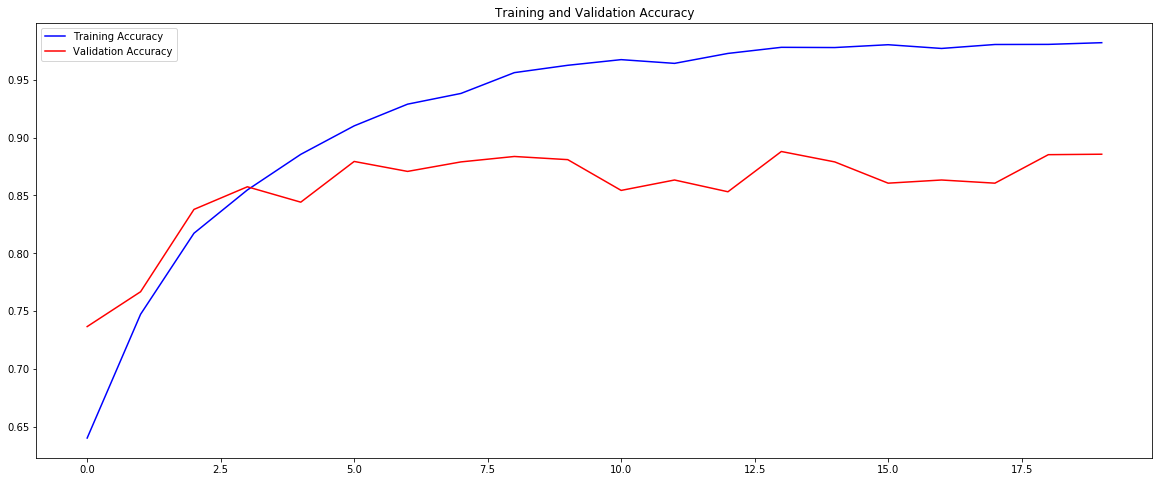

<Figure size 432x288 with 0 Axes>

In [48]:
#accuracy visualization

import matplotlib.pyplot as plt

acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']

epochs = range(len(acc))

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(epochs, acc, 'b', label='Training Accuracy')
ax.plot(epochs, val_acc, 'r', label='Validation Accuracy')
ax.set_title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

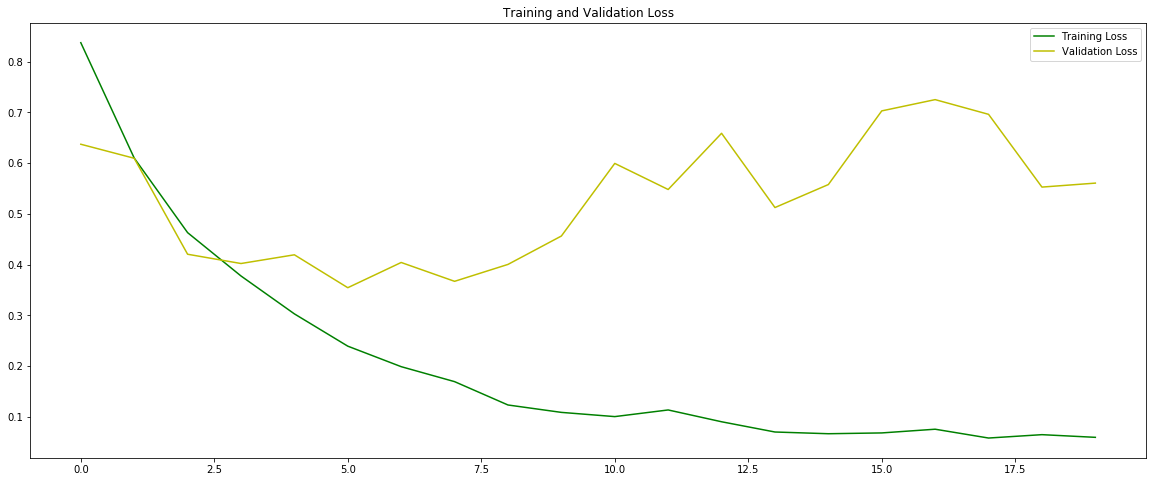

<Figure size 432x288 with 0 Axes>

In [49]:
#loss visualization

import matplotlib.pyplot as plt

loss = cnn.history['loss']
val_loss = cnn.history['val_loss']

epochs = range(len(loss))

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(epochs, loss, 'g', label='Training Loss')
ax.plot(epochs, val_loss, 'y', label='Validation Loss')
ax.set_title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
# Convert & Save TF-Lite Model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)